In [1]:
# importing libraries needed
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# show data
df = pd.read_csv('C:/Users/Dhano/Documents/Pacmann/Time_Series-Forecasting/cat_capacity/incoming-cat-copy_2017-2021.csv')
df.head()

,creation_date,hour,premium,basic
0,2017-06-05,21,3,35
1,2017-08-05,11,19,33
2,2017-08-29,18,10,1
3,2017-10-25,23,24,53
4,2017-12-29,0,27,40


In [3]:
# time range
df['creation_date'].min(), df['creation_date'].max()

('2017-01-01', '2021-07-30')

In [4]:
# check for null values
df.isnull().sum()

creation_date    0
hour             0
premium          0
basic            0
dtype: int64

In [5]:
# indexing
df = df.set_index('creation_date')
df.index

Index(['2017-06-05', '2017-08-05', '2017-08-29', '2017-10-25', '2017-12-29',
       '2018-02-16', '2018-03-21', '2017-07-02', '2017-08-29', '2017-11-24',
       ...
       '2017-01-30', '2017-01-19', '2020-03-06', '2017-09-22', '2017-01-26',
       '2017-02-18', '2017-02-16', '2017-03-11', '2017-04-18', '2017-04-14'],
      dtype='object', name='creation_date', length=39480)

In [6]:
# reset index
df = df.reset_index()
df.head()

,creation_date,hour,premium,basic
0,2017-06-05,21,3,35
1,2017-08-05,11,19,33
2,2017-08-29,18,10,1
3,2017-10-25,23,24,53
4,2017-12-29,0,27,40


In [7]:
# change creation_date type to timestamp
df['creation_date'] = pd.to_datetime(df.creation_date)
df.head()

,creation_date,hour,premium,basic
0,2017-06-05,21,3,35
1,2017-08-05,11,19,33
2,2017-08-29,18,10,1
3,2017-10-25,23,24,53
4,2017-12-29,0,27,40


In [8]:
# set creation_date as index
df = df.set_index('creation_date')
df.index

DatetimeIndex(['2017-06-05', '2017-08-05', '2017-08-29', '2017-10-25',
               '2017-12-29', '2018-02-16', '2018-03-21', '2017-07-02',
               '2017-08-29', '2017-11-24',
               ...
               '2017-01-30', '2017-01-19', '2020-03-06', '2017-09-22',
               '2017-01-26', '2017-02-18', '2017-02-16', '2017-03-11',
               '2017-04-18', '2017-04-14'],
              dtype='datetime64[ns]', name='creation_date', length=39480, freq=None)

In [10]:
# get premium data
df_premium = df.iloc[:,[1]]
df_premium.head()

,premium
creation_date,
2017-06-05,3
2017-08-05,19
2017-08-29,10
2017-10-25,24
2017-12-29,27


In [11]:
# using average daily volume
y = df_premium['premium'].resample('MS').mean()

In [12]:
y['2020']

creation_date
2020-01-01     95.237903
2020-02-01    116.353448
2020-03-01    121.128901
2020-04-01     84.091667
2020-05-01     63.784946
2020-06-01     78.866667
2020-07-01     83.505376
2020-08-01     81.938172
2020-09-01     88.784722
2020-10-01     86.766129
2020-11-01     94.541667
2020-12-01     95.469086
Freq: MS, Name: premium, dtype: float64

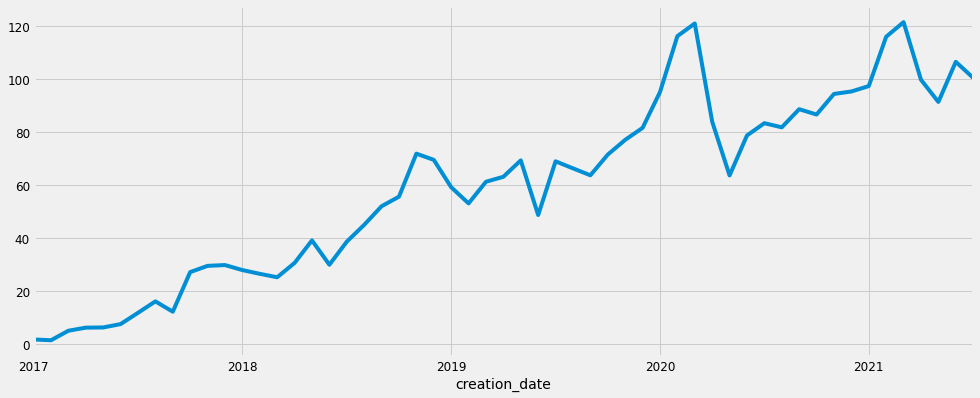

In [13]:
# plot
y.plot(figsize=(15, 6))
plt.show()

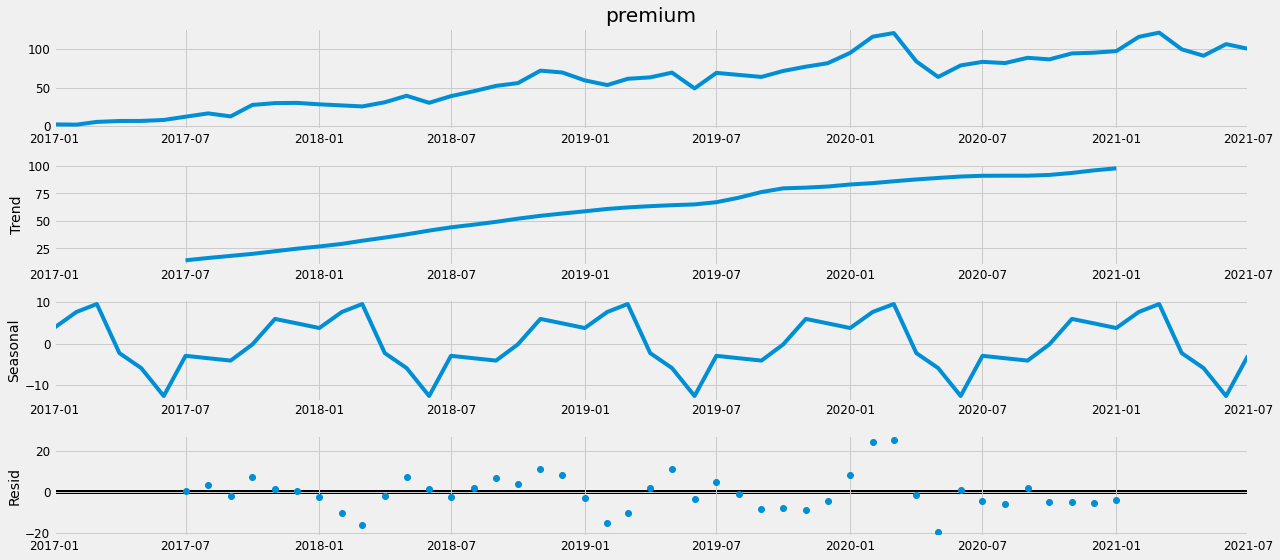

In [14]:
# decompose into trend, seasonality and noise
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
# ARIMA models
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:613.1401440239712
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:460.27659965986356
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:399.70350874312453


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1321.032040527279
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:391.6486862453112
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:384.11756648147025
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:276.743375344431
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:262.60660714742596
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:543.8255313414913
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:406.9091913530244
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:358.4929618720491


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1325.7785486329378
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:367.3462394684609


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:352.7092785228387
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:265.32423672928985
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:246.03453097135937
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:404.28312026488527
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:319.33610370459786
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:331.38045081005663


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1175.2613997515577
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:326.2683245191115
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:321.16590718170113
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:247.33936822904525


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1001.3797124643438
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:399.3212524296164
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:314.3941454582285
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:326.1317423373814


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1281.2050566216458
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:328.2561957342334
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:316.3438603206756
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:249.33268099522581


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1261.8585680357407
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:412.7253443234271
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:328.1120393248181
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:337.6474099066097


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1259.7604213502752
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:328.25881921712187
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:329.88972412475397
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:247.4962043522854
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:249.45630646573696


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:407.98575270100065
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:323.2027895628763
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:332.51643753650575


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1199.425950659554
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:330.2378619801677
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:325.1094529651037
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:249.30839452010255
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:244.17034794779556
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:406.1792786577562
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:321.26038971312596
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:333.3561899186974


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1127.6518502389208
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:321.56581875081224
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:323.1333096493561
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:242.08104044715543


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1109.174174371058
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:400.4241304284018
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:315.3894006835895
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:319.96754008591256


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1063.2356778118842
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:319.92788660905904
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:317.37987427235026
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:238.7287127671797
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1043.730881786178


C:\Users\Dhano\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
### ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:238.7287127671797 <- the lowest, thus the optimal options

# fitting the model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5498      0.183      3.009      0.003       0.192       0.908
ma.L1         -0.9572      0.367     -2.611      0.009      -1.676      -0.239
ar.S.L12      -0.3398      0.326     -1.042      0.297      -0.979       0.299
sigma2       160.9654     72.105      2.232      0.026      19.642     302.288


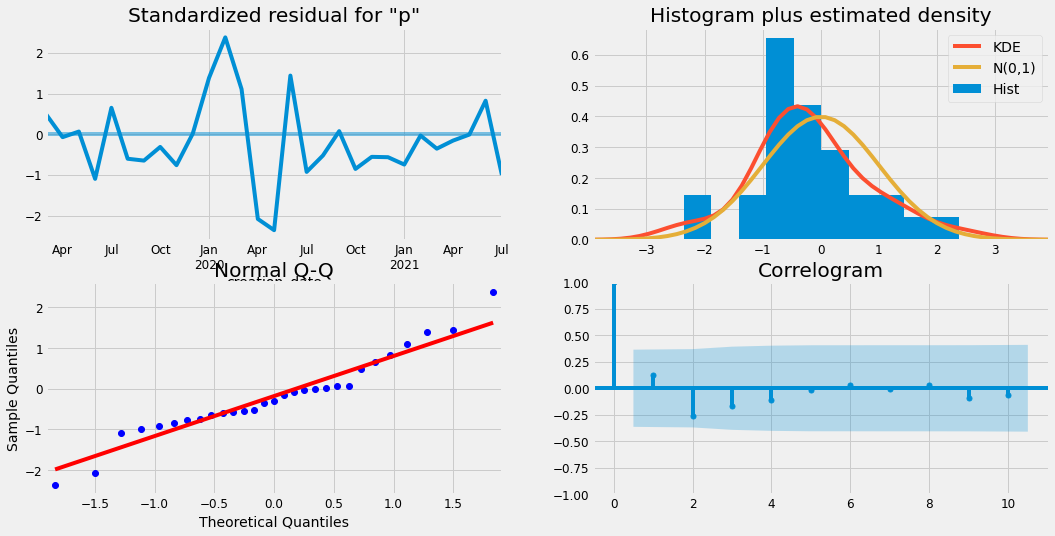

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

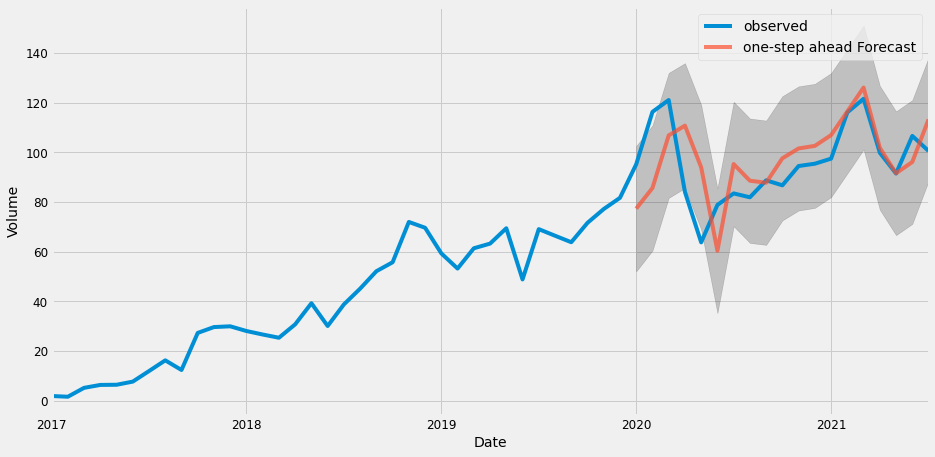

In [23]:
# plot actual vs predicted
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2017':].plot(label='observed')

pred.predicted_mean.plot(ax=ax,
                         label='one-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.legend()
plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 222.31
The Root Mean Squared Error of our forecasts is 14.91


# Summary

The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily premium volume in the test set within 14.91 of the real premium volume.

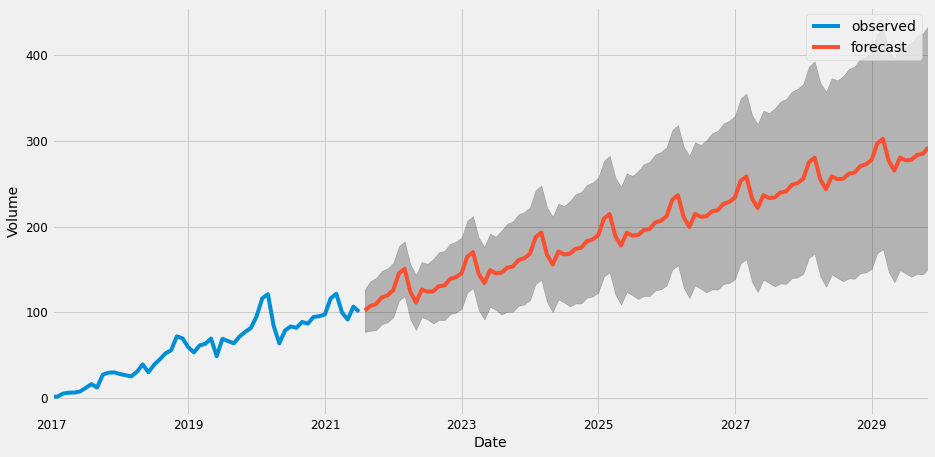

In [28]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')

plt.legend()
plt.show()